### Importing libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
from IPython.display import display

#### Using US videos dataset in this analysis

In [2]:
us = pd.read_csv(r"C:\Users\vagundu\Desktop\vamshi\Data_Science\Projects\youtube_trending_video_analysis\data\USvideos.csv")

In [8]:
us.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False


In [3]:
us.shape

(40949, 16)

The dataset contains 16 columns and approximately 40 thousand rows.



In [4]:
us.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

Some of the columns are redundant for our analysis so we will drop them.


In [5]:
us.drop(['video_id','thumbnail_link', 'description'], axis=1, inplace=True)

In [6]:
us.shape

(40949, 13)

Three columns have been dropped. 

In [9]:
us.dtypes

trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
dtype: object

We should always check the data types of columns because some functions and methods can only be used with certain data types. For instance, the dates must be stored with datetime data type so that we can use the date time functionalities of pandas.

Trending date and publish time columns have object data type which needs to changed as datetime. Let’s take a look at these columns first.

In [10]:
us[['trending_date','publish_time']].head()

,trending_date,publish_time
0,17.14.11,2017-11-13T17:13:01.000Z
1,17.14.11,2017-11-13T07:30:00.000Z
2,17.14.11,2017-11-12T19:05:24.000Z
3,17.14.11,2017-11-13T11:00:04.000Z
4,17.14.11,2017-11-12T18:01:41.000Z


The publish time column can easily be converted with the astype function because it is in a proper format.

In [11]:
us['publish_time'] = us['publish_time'].astype('datetime64[ns]')


For the trending date column, we need some reformatting. The first two characters represent the last two digits of year (e.g. 17 is 2017). Since the data belongs to years 2017 and 2018, a simple solution is to concatenate the column with ‘20’.

In [12]:
us['trending_date'] = ['20'] + us['trending_date']


The order in trending date column is year, day, and month which is not the standard format. However, we can easily handle it using the format parameter of the to_datetime function.

In [13]:
us['trending_date'] = pd.to_datetime(us['trending_date'], format = "%Y.%d.%m")


In [15]:
print(us[['trending_date','publish_time']].head())
print(us[['trending_date','publish_time']].dtypes)

  trending_date        publish_time
0    2017-11-14 2017-11-13 17:13:01
1    2017-11-14 2017-11-13 07:30:00
2    2017-11-14 2017-11-12 19:05:24
3    2017-11-14 2017-11-13 11:00:04
4    2017-11-14 2017-11-12 18:01:41
trending_date    datetime64[ns]
publish_time     datetime64[ns]
dtype: object


The difference between the time a video is published and its trending time might be a useful piece of information for the analysis. Since both columns have datetime data type, we can easily calculate the time difference.

In [16]:
us['time_diff'] = us['trending_date'] - us['publish_time']
us['time_diff'].head()


0   0 days 06:46:59
1   0 days 16:30:00
2   1 days 04:54:36
3   0 days 12:59:56
4   1 days 05:58:19
Name: time_diff, dtype: timedelta64[ns]

We have calculated the difference by using a minus sign and assigned it to a new column called “time_diff”. The data type of this column is timedelta which is the standard for time intervals.


The publish time column contains both the date and time. We can easily access each part by using the date and time methods under the dt accessor.

In [17]:
print(us['publish_time'].dt.date[0])

print(us['publish_time'].dt.time[0])


2017-11-13
17:13:01


We should also do some preprocessing on textual data. For instance, we might need to find the most common words in the trending video titles.


In [18]:
us['title'].head()

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
Name: title, dtype: object

Some titles contain all capital letters whereas some is mixture of capital and lower case letters. Let’s convert them all to lower case letters using lower() method from str

In [19]:
us['title'] = us['title'].str.lower()
us['title'].head()

0                   we want to talk about our marriage
1    the trump presidency: last week tonight with j...
2    racist superman | rudy mancuso, king bach & le...
3                     nickelback lyrics: real or fake?
4                             i dare you: going bald!?
Name: title, dtype: object

It is better to also remove the punctuation so that we have cleaner textual data. There are many alternatives to remove punctuation. One of the simplest ways to use the replace function of str accessor and perform regex-based replacement.

In [21]:
us['title'] = us['title'].str.replace(r'[^\w\s]+', '')
us['title'].head()

0                   we want to talk about our marriage
1    the trump presidency last week tonight with jo...
2    racist superman  rudy mancuso king bach  lele ...
3                       nickelback lyrics real or fake
4                                i dare you going bald
Name: title, dtype: object

In [22]:
us['title'][1]

'the trump presidency last week tonight with john oliver hbo'

The data type of the time diff column is timedelta which allows for using aggregate functions so we can apply the mean function.

In [24]:
us.time_diff.mean()

Timedelta('16 days 05:21:53.236220664')

The average time is 16 days and 5 hours

In [25]:
us.channel_title.nunique()


2207

There are 2207 unique channels in the dataset

The data type of the time_diff column is timedelta. We need to convert it to a numerical variable to plot its distribution. One way is to divide the time_diff column by another timedelta interval. 

In [32]:
us['time_diff'].head()

0   0 days 06:46:59
1   0 days 16:30:00
2   1 days 04:54:36
3   0 days 12:59:56
4   1 days 05:58:19
Name: time_diff, dtype: timedelta64[ns]

In [31]:
us['time_diff_hour'] = us['time_diff'] / pd.Timedelta('1 hour')
display(us['time_diff_hour'].head())
display(us['time_diff_hour'].mean())
display(us['time_diff_hour'].mean() / 24)

0     6.783056
1    16.500000
2    28.910000
3    12.998889
4    29.971944
Name: time_diff_hour, dtype: float64

389.3647878390736

16.223532826628066

<AxesSubplot:ylabel='time_diff_hour'>

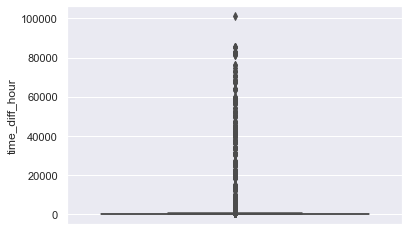

In [33]:
sns.boxplot(data=us, y='time_diff_hour')


 The average value of this column is 389 but we observe outliers as high as 100000. lets eliminate some ouliers and see

In [34]:
len(us)

40949

In [36]:
len(us[us.time_diff_hour > 200])


9563

In [37]:
len(us[us.time_diff_hour > 500])


1042

In [38]:
len(us[us.time_diff_hour > 800])


353

In [41]:
len(us[us.time_diff_hour > 1000])


331

In [40]:
len(us[us.time_diff_hour > 600])


588

The number of rows in which the time difference is more than 600 hours is 588 which is very small compared to the total number rows in the dataset. hence, we can drop these outliers.

In [42]:
us = us[us.time_diff_hour <= 600]


the boxplot after removing outliers makes some sense, the median is around 100 for the time difference hour

<AxesSubplot:ylabel='time_diff_hour'>

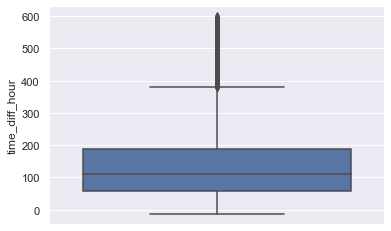

In [64]:
sns.boxplot(data=us, y='time_diff_hour')


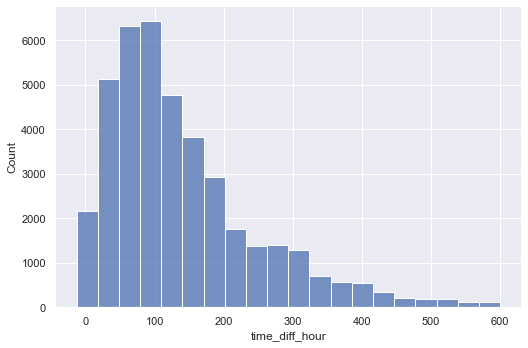

In [43]:
sns.displot(data=us, x='time_diff_hour', kind='hist',aspect=1.5, bins=20)


Most of the values are around 100 so it is like to become trending in approximately 4 days.

top 10 trending channels videos using the value_counts function of pandas.

In [47]:
us.channel_title.value_counts()[:10]


ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Netflix                                   193
Vox                                       193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: channel_title, dtype: int64

The group by function of pandas with multiple aggregate functions will give us the average views of trending videos published by these channels

In [48]:
us['views_mil'] = us['views'] / 1000000
us[['channel_title','views_mil']].groupby('channel_title').agg(['mean','count']).sort_values(by=('views_mil','count'), ascending=False)

views_mil      
                                            mean count
channel_title                                         
ESPN                                    0.520464   203
The Tonight Show Starring Jimmy Fallon  1.377799   197
Vox                                     0.635409   193
Netflix                                 0.962789   193
TheEllenShow                            1.315244   193
...                                          ...   ...
SiggasNation™                           0.010525     1
Commercials Funny                       0.022034     1
ClovesVEVO                              0.030260     1
edlover4real                            0.006172     1
RiceGum                                 2.016536     1

[2103 rows x 2 columns]

The Screen Junkies channel has the highest average which is about 1.75 million per video. ESPN has the second lowest average although it has the highest number of trending videos.

lets find out how the number of trending videos changes over time.

In [49]:
daily0 = us[['trending_date']].value_counts().reset_index().sort_values(by='trending_date').reset_index(drop=True)

In [56]:
daily = daily0.rename(columns={0:'count'})

In [57]:
daily

,trending_date,count
0,2017-11-14,192
1,2017-11-15,195
2,2017-11-16,195
3,2017-11-17,197
4,2017-11-18,199
...,...,...
200,2018-06-10,186
201,2018-06-11,182
202,2018-06-12,191
203,2018-06-13,184


The daily dataframe contains the date and the number of videos that become trending in each date. We can now generate a line plot based on the daily dataframe.

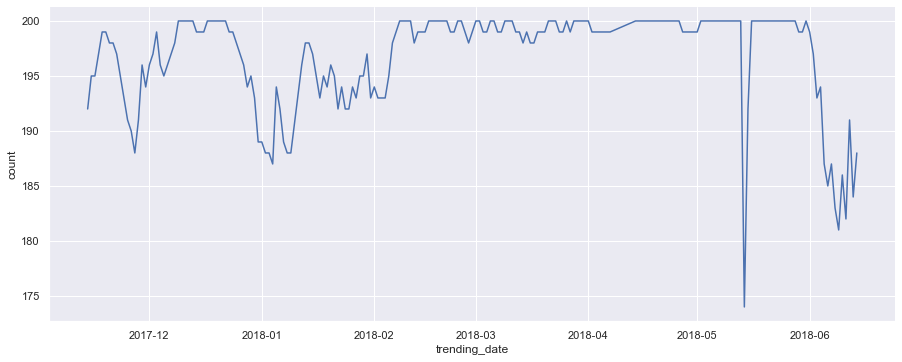

In [62]:
sns.relplot(data=daily, x='trending_date', y='count', kind='line', aspect=2.5)

Most of the values are between 190 and 200 with a few exceptional days.

Let’s also find the trending video with the highest number of views.

In [63]:
us.sort_values(by='views', ascending=False)[['title','views']].iloc[0,:]

title    childish gambino  this is america official video
views                                           217750076
Name: 38146, dtype: object

The most trending video in terms of the number of views have been viewed over 21 crore times.